In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Let's start to see what the data lools like

In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# I need to separate the label column

In [3]:
y = train.pop('label')
X = train.values

X.shape

(42000, 784)

# In order to work with 2D CNN i need to reshape the data in order to have a matrix of 28x28x1 where the 1 stands for the pixel value in the scale of gray, instead the 28x28 for the size of if

In [4]:
X = X.reshape(-1,28,28,1)
X.shape

(42000, 28, 28, 1)

# In order to work faster with tensorflow i need to normalise the numbers so that they are smaller

In [5]:
X = X / 255.0

# Check how the image looks like

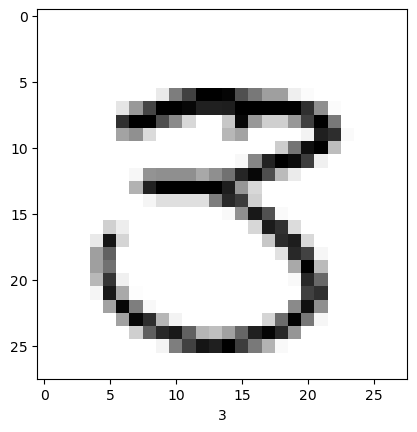

In [6]:
import matplotlib.pyplot as plt

IMG_INDEX = 7  

plt.imshow(X[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(y[IMG_INDEX])
plt.show()

# The image looks ok so we can split the dataset for the valuation

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=1)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Import TF and create a custom CNN with few layers

In [8]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25)) # important to not overfit and increase generalization
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # we just have 10 digits

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=7,
                    validation_data=(X_val, y_val))

Epoch 1/7


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-11 12:56:25.308799: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


880/880 [==============================] - 16s 6ms/step - loss: 0.3127 - accuracy: 0.9005 - val_loss: 0.0905 - val_accuracy: 0.9705
Epoch 2/7
880/880 [==============================] - 6s 7ms/step - loss: 0.0917 - accuracy: 0.9717 - val_loss: 0.0627 - val_accuracy: 0.9803
Epoch 3/7
880/880 [==============================] - 5s 6ms/step - loss: 0.0637 - accuracy: 0.9792 - val_loss: 0.0541 - val_accuracy: 0.9833
Epoch 4/7
880/880 [==============================] - 5s 5ms/step - loss: 0.0538 - accuracy: 0.9831 - val_loss: 0.0383 - val_accuracy: 0.9867
Epoch 5/7
880/880 [==============================] - 5s 6ms/step - loss: 0.0434 - accuracy: 0.9855 - val_loss: 0.0423 - val_accuracy: 0.9869
Epoch 6/7
880/880 [==============================] - 5s 6ms/step - loss: 0.0373 - accuracy: 0.9885 - val_loss: 0.0377 - val_accuracy: 0.9883
Epoch 7/7
880/880 [==============================] - 5s 6ms/step - loss: 0.0321 - accuracy: 0.9891 - val_loss: 0.0480 - val_accuracy: 0.9841


# The train and val accuracy looks fine with no overfit, so we can proceed to predict the result for the test dataset

# Import the test dataset and apply the same processing we did with the train dataset, since they should have the same structure and normalization

In [11]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test = test.values
X_test = test.reshape(-1,28,28,1)

# Normalize pixel values to be between 0 and 1
X_test = X_test / 255.0

# We can predict now the results

In [12]:
pred = model.predict(X_test)
pred

875/875 [==============================] - 2s 2ms/step


array([[1.51568660e-10, 1.12842869e-07, 9.99999166e-01, ...,
        1.63654743e-08, 4.31162789e-07, 4.03589162e-10],
       [9.99882579e-01, 1.48102956e-07, 5.65426490e-06, ...,
        1.66962666e-09, 2.19449998e-06, 1.39865881e-06],
       [1.34275853e-08, 5.62730362e-10, 2.85426978e-07, ...,
        2.08481978e-07, 6.98370059e-05, 9.99915123e-01],
       ...,
       [1.36567639e-14, 9.80698921e-13, 2.54052985e-12, ...,
        9.46913450e-11, 3.32116487e-11, 5.65863967e-10],
       [1.71868783e-10, 5.87573479e-12, 6.87406299e-10, ...,
        4.38060717e-08, 8.66883028e-08, 9.99997497e-01],
       [1.58898953e-11, 1.38283545e-08, 9.99999642e-01, ...,
        2.22833152e-09, 3.33707987e-07, 7.05365766e-11]], dtype=float32)

# We need to extract the correct value from the softmax output

In [13]:
pred = np.argmax(pred, axis=1)
pred

array([2, 0, 9, ..., 3, 9, 2])

# And now we can proceed with the submission process

In [14]:
sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [15]:
sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [16]:
sub['Label'] = pred

In [17]:
sub.to_csv("submission.csv", index=False)
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
